### Dataset example inspection notebook

This notebook shares a summary of dataset contents, and provides a visual comparision of two user defined examples against eachother.

Requires knowledge of the dataset. Does not currentl work with all Qoherent datasets and is therefore a work in progress.



In [124]:
#Import dependancies
import matplotlib.pyplot as plt
import numpy as np
import pickle
from pathlib import Path
import random


In [150]:
# Select and load dataset files

path = Path.cwd()

# filename1 = "datasets_Qoherent_Modrec_Dataset_Unimpaired.dat"   #path to unimpaired dataset - uncomment to choose this dataset
filename1 = "datasets_Qoherent_Modrec_Dataset_AGWN.dat"   #path to AGWN dataset - uncomment to choose this dataset
# filename1 = "datasets_example-simple-dataset.dat"  #path to simple low footprint dataset - uncomment to choose this dataset

with open((path/filename1).resolve().as_posix(), 'rb') as f:
    X1 = pickle.load(f, encoding='bytes')
    try:
        for i in range(10):
            X2 = pickle.load(f, encoding='bytes')
            X1 = {**X1,**X2}
            X2 = None      
        
    except:
        None


In [151]:
#list the keys in the dataset
list(X1.keys())

[('bpsk', -20),
 ('bpsk', -19),
 ('bpsk', -18),
 ('bpsk', -17),
 ('bpsk', -16),
 ('bpsk', -15),
 ('bpsk', -14),
 ('bpsk', -13),
 ('bpsk', -12),
 ('bpsk', -11),
 ('bpsk', -10),
 ('bpsk', -9),
 ('bpsk', -8),
 ('bpsk', -7),
 ('bpsk', -6),
 ('bpsk', -5),
 ('bpsk', -4),
 ('bpsk', -3),
 ('bpsk', -2),
 ('bpsk', -1),
 ('bpsk', 0),
 ('bpsk', 1),
 ('bpsk', 2),
 ('bpsk', 3),
 ('bpsk', 4),
 ('bpsk', 5),
 ('bpsk', 6),
 ('bpsk', 7),
 ('bpsk', 8),
 ('bpsk', 9),
 ('bpsk', 10),
 ('bpsk', 11),
 ('bpsk', 12),
 ('bpsk', 13),
 ('bpsk', 14),
 ('bpsk', 15),
 ('bpsk', 16),
 ('bpsk', 17),
 ('bpsk', 18),
 ('bpsk', 19),
 ('bpsk', 20),
 ('qpsk', -20),
 ('qpsk', -19),
 ('qpsk', -18),
 ('qpsk', -17),
 ('qpsk', -16),
 ('qpsk', -15),
 ('qpsk', -14),
 ('qpsk', -13),
 ('qpsk', -12),
 ('qpsk', -11),
 ('qpsk', -10),
 ('qpsk', -9),
 ('qpsk', -8),
 ('qpsk', -7),
 ('qpsk', -6),
 ('qpsk', -5),
 ('qpsk', -4),
 ('qpsk', -3),
 ('qpsk', -2),
 ('qpsk', -1),
 ('qpsk', 0),
 ('qpsk', 1),
 ('qpsk', 2),
 ('qpsk', 3),
 ('qpsk', 4),
 ('

In [152]:
labels = list(X1.keys())

total_examples = 0
for a in labels:
    total_examples = total_examples +  X1[a].shape[0]


l=list(X1.values())


try:
    snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], X1.keys())))), [1,0])
    no_snr = False
except:
    mods = map(lambda j: sorted(list(set(map(lambda x: x[j], X1.keys())))), [1,0])
    no_snr = True


example_size = X1[labels[0]].shape[0]

#print attributes
print("Dataset filename is: ", filename1)

print("Dataset has", len(labels), "unique label pairs")

print("Dataset examples are labelled with the following modulations:", mods)

# print("Dataset examples are labelled with the following SNRs:", snrs)


print("Dataset has", total_examples ,"total examples")

print("A typical example is ", l[0][0].shape ,"in shape and has", example_size,"examples")

Dataset filename is:  datasets_Qoherent_Modrec_Dataset_AGWN.dat
Dataset has 451 unique label pairs
Dataset examples are labelled with the following modulations: ['8psk', 'am-dsb', 'am-ssb', 'bpsk', 'gfsk', 'nbfm', 'pam4', 'qam16', 'qam64', 'qpsk', 'wbfm']
Dataset has 902000 total examples
A typical example is  (2, 1024) in shape and has 2000 examples


In [153]:
## to see the keys in the dataset

print(X1.keys())

dict_keys([('bpsk', -20), ('bpsk', -19), ('bpsk', -18), ('bpsk', -17), ('bpsk', -16), ('bpsk', -15), ('bpsk', -14), ('bpsk', -13), ('bpsk', -12), ('bpsk', -11), ('bpsk', -10), ('bpsk', -9), ('bpsk', -8), ('bpsk', -7), ('bpsk', -6), ('bpsk', -5), ('bpsk', -4), ('bpsk', -3), ('bpsk', -2), ('bpsk', -1), ('bpsk', 0), ('bpsk', 1), ('bpsk', 2), ('bpsk', 3), ('bpsk', 4), ('bpsk', 5), ('bpsk', 6), ('bpsk', 7), ('bpsk', 8), ('bpsk', 9), ('bpsk', 10), ('bpsk', 11), ('bpsk', 12), ('bpsk', 13), ('bpsk', 14), ('bpsk', 15), ('bpsk', 16), ('bpsk', 17), ('bpsk', 18), ('bpsk', 19), ('bpsk', 20), ('qpsk', -20), ('qpsk', -19), ('qpsk', -18), ('qpsk', -17), ('qpsk', -16), ('qpsk', -15), ('qpsk', -14), ('qpsk', -13), ('qpsk', -12), ('qpsk', -11), ('qpsk', -10), ('qpsk', -9), ('qpsk', -8), ('qpsk', -7), ('qpsk', -6), ('qpsk', -5), ('qpsk', -4), ('qpsk', -3), ('qpsk', -2), ('qpsk', -1), ('qpsk', 0), ('qpsk', 1), ('qpsk', 2), ('qpsk', 3), ('qpsk', 4), ('qpsk', 5), ('qpsk', 6), ('qpsk', 7), ('qpsk', 8), ('qpsk

In [154]:
#### SELECTING EXAMPLES

## setting modulations

mod_1 = 'bpsk' ### select a modulation for the first plot
mod_2 = 'qam64' ### select a modulation for the second plot


## setting SNR - NOTE: ONLY WORKS ON DATASET WITH CONFIGURED SNRS

snr_1 = 2 ### select an SNR for the first plot
snr_2 = 18 ### select an SNR for the second plot


2000


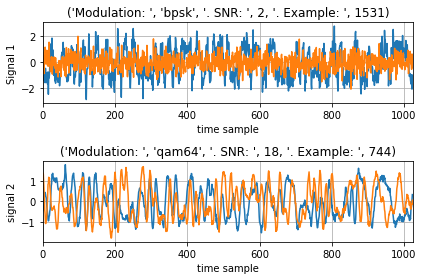

In [155]:

if no_snr == True:
    array1 = X1[(mod_1, )] # Replace label with one that that exists in dataset
    array2 = X1[(mod_2, )] # Replace label with one that that exists in dataset
else:
    array1 = X1[(mod_1, snr_1)] # Replace label with one that that exists in dataset
    array2 = X1[(mod_2, snr_2)] # Replace label with one that that exists in dataset


#print(array1[0, 0, :])
length = array1[0, 0, :].shape[0]

t = np.arange(0, length, 1)

fig, axs = plt.subplots(2, 1)

print(example_size)


#chooses random examples from the list of examples in the class to plot
plot1_idx = random.randint(0,example_size) # select random example that exists in dataset for first plot
plot2_idx = random.randint(0,example_size)  # select random example that exists in dataset for second plot

title1 = 'Modulation: ',mod_1,'. SNR: ',snr_1,'. Example: ',plot1_idx
axs[0].plot(t, array1[plot1_idx, 0, :], t, array1[plot1_idx, 1, :])
axs[0].set_xlim(0, length)
axs[0].set_xlabel('time sample')
axs[0].set_ylabel('Signal 1')
axs[0].set_title(title1)
axs[0].grid(True)

title2='Modulation: ',mod_2,'. SNR: ',snr_2,'. Example: ',plot2_idx
axs[1].plot(t, array2[plot2_idx, 0, :], t, array2[plot2_idx, 1, :])
axs[1].set_xlim(0, length)
axs[1].set_xlabel('time sample')
axs[1].set_ylabel('signal 2')
axs[1].set_title(title2)
axs[1].grid(True)


fig.tight_layout()
plt.show()

